## 导入需要用到的包

In [1]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as XGBR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import pandas as pd
import os

d:\ANACONDA\lib\site-packages\pkg_resources\__init__.py:125: PkgResourcesDeprecationWarning: -PKG-VERSION is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


## 数据读取

#### cytotoxicity

In [2]:
data = pd.read_excel('./S1.xlsx', sheet_name='cytotoxicity',index_col=0)
Y = data.iloc[:,1]
X = data.iloc[:,2:]
display(Y)

GNP1      143.0
GNP2       87.6
GNP3       94.1
GNP4       87.6
GNP5       59.4
GNP6       83.8
GNP7        1.5
GNP8        1.1
GNP9        1.0
GNP10       0.8
GNP11       1.4
GNP12       1.0
PdNP1     351.5
PdNP2     304.3
PdNP3     226.8
PdNP4     182.7
PdNP5     197.6
PdNP6     130.7
PdNP7       7.8
PdNP8       3.2
PdNP9       5.2
PdNP10      2.4
PdNP11      3.5
PdNP12      2.4
Name: EC70(nmol/L), dtype: float64

## 预打分

In [3]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=100)
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.062498154464250846 TEST: 0.5998047339607622


### 设置train_test_split的随机数种子

In [7]:
# CV = 0
# test =0
for i in range(500):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=i)
    rfc = RandomForestRegressor(random_state=60)
    CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    regressor = rfc.fit(Xtrain, Ytrain)
    score_test = regressor.score(Xtest,Ytest)
#     if CV < CV_score and test < score_test:
#         CV = CV_score
#         test = score_test
    if CV_score>0.6 and score_test>0.6:
        print("5cv:",CV_score,"TEST:",score_test,"random_state:",i)

5cv: 0.6215904794946432 TEST: 0.7523035451508142 random_state: 30
5cv: 0.6751313067672712 TEST: 0.6878498653547196 random_state: 58
5cv: 0.6286238168462603 TEST: 0.6905386096043058 random_state: 223
5cv: 0.6072438845216096 TEST: 0.6805357249318964 random_state: 232
5cv: 0.7107248622531147 TEST: 0.7306290713404062 random_state: 301
5cv: 0.6323630656710725 TEST: 0.6346225697631187 random_state: 304
5cv: 0.6664610095260332 TEST: 0.6242446120763845 random_state: 316
5cv: 0.6732047971096178 TEST: 0.637131327005864 random_state: 421
5cv: 0.65080514805245 TEST: 0.9309276248585417 random_state: 430
5cv: 0.6053845364441501 TEST: 0.6037003854411241 random_state: 438


### 选择分数较高的train_test_split中的random_state

In [4]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=301)
rfc = RandomForestRegressor(random_state=60)
CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
regressor = rfc.fit(Xtrain, Ytrain)
score_test = regressor.score(Xtest,Ytest)
print("5cv:",CV_score,"TEST:",score_test)

5cv: 0.7107248622531147 TEST: 0.7306290713404062


### 划分数据集后对应粒径
#### （不运行，之前已保存）

In [9]:
Xtrain.index

Index(['GNP24', 'PdNP7', 'PdNP8', 'GNP144', 'GNP96', 'GNP18', 'GNP157',
       'GNP64', 'GNP32', 'GNP133',
       ...
       'GNP161', 'GNP145', 'GNP71', 'GNP26', 'GNP22', 'GNP17', 'GNP148',
       'GNP137', 'GNP146', 'GNP39'],
      dtype='object', length=117)

In [11]:
logP = pd.read_excel('./S1.xlsx', sheet_name='logP',index_col=0)
logP

,logP,Standard deviation (n = 3),Experimental protocol,Size
Index,,,,
GNP1,-0.6635,0.7,The experimental logP values of all the nanopa...,6.20
GNP2,-0.3728,0.4,NaN,6.20
GNP3,-0.3219,0.2,NaN,6.10
GNP4,0.0252,0.1,NaN,6.50
GNP5,1.0720,0.1,NaN,6.30
...,...,...,...,...
PdNP8,-0.8643,0.2,NaN,26.31
PdNP9,-0.6113,0.4,NaN,25.06
PdNP10,0.4681,0.2,NaN,26.76


In [12]:
size = logP.loc[Xtrain.index,:]
size

,logP,Standard deviation (n = 3),Experimental protocol,Size
GNP24,0.3600,­,NaN,3.63
PdNP7,-0.9405,0.4,NaN,26.02
PdNP8,-0.8643,0.2,NaN,26.31
GNP144,-0.9600,0.05,NaN,5.00
GNP96,1.9900,­,NaN,5.00
...,...,...,...,...
GNP17,0.4840,­,NaN,4.67
GNP148,2.3800,0.19,NaN,7.30
GNP137,-2.3000,0.16,NaN,5.80
GNP146,-2.2800,0.13,NaN,8.00


In [13]:
# pd.DataFrame(size).to_excel('./logP_size.xlsx')

## RF模型调参

In [9]:
score_5cv_all = []
for i in range(0, 200, 1):
    rfc =RandomForestRegressor(random_state=i)
    score_5cv =cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
random_state_5cv = range(0, 200)[score_5cv_all.index(max(score_5cv_all))]

print("Best_5cv score：{}".format(score_max_5cv),
      "random_5cv:{}".format(random_state_5cv))

score_5cv_all = []
for i in range(1, 400, 1):
    rfc = RandomForestRegressor(n_estimators=i
                                , random_state=random_state_5cv)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
n_est_5cv = range(1,400)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "n_est_5cv:{}".format(n_est_5cv))

score_5cv_all = []
for i in range(1, 300, 1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_depth_5cv = range(1,300)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_depth_5cv:{}".format(max_depth_5cv))

score_5cv_all = []
for i in range(1,X.shape[1]+1):
    rfc = RandomForestRegressor(n_estimators=n_est_5cv
                                ,random_state=random_state_5cv
                                ,max_depth=max_depth_5cv
                                ,max_features=i)
    score_5cv = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
    score_5cv_all.append(score_5cv)
    pass

score_max_5cv = max(score_5cv_all)
max_features_5cv = range(1,X.shape[1]+1)[score_5cv_all.index(score_max_5cv)]

print("Best_5cv score：{}".format(score_max_5cv),
      "max_features_5cv:{}".format(max_features_5cv))

Best_5cv score：0.7672463201863492 random_5cv:90
Best_5cv score：0.7914592528232351 n_est_5cv:45
Best_5cv score：0.7923274690434056 max_depth_5cv:3
Best_5cv score：0.7971018002522449 max_features_5cv:113


### 使用调整过后的参数

In [7]:
rfc = RandomForestRegressor(random_state=90
                            ,n_estimators=45
                            ,max_depth=3
                            ,max_features=113
                           )

CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(rfc, Xtrain, Ytrain, cv=5)
rmse_5cv = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
print("r2_5cv:",CV_score,"rmse_5CV",rmse_5cv)

regressor = rfc.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
rmse_test = np.sqrt(mean_squared_error(Ytest,test_predictions))
print("r2_test:",score_test,"rmse_test",rmse_test)

expvspred_5cv = pd.DataFrame({'Exp_5cv': Ytrain, 'Pred_5cv':CV_predictions})
expvspred_test = pd.DataFrame({'Exp_test':Ytest,'Pred_test':test_predictions})

writer = pd.ExcelWriter('cytotoxicity_predict_RF.xlsx')
expvspred_5cv.to_excel(excel_writer=writer,sheet_name="5cv")
expvspred_test.to_excel(excel_writer=writer,sheet_name="test")
writer.save()

r2_5cv: 0.7971018002522449 rmse_5CV 48.2058902169111
r2_test: 0.8082899292744147 rmse_test 31.598967660798614


In [20]:
from sklearn.metrics import mean_absolute_error

rfc = RandomForestRegressor(random_state=90
                            ,n_estimators=45
                            ,max_depth=3
                            ,max_features=113
                           )

CV_score = cross_val_score(rfc, Xtrain, Ytrain, cv=5).mean()
CV_predictions = cross_val_predict(rfc, Xtrain, Ytrain, cv=5)
rmse_5cv = np.sqrt(mean_squared_error(Ytrain,CV_predictions))
mae_5cv = mean_absolute_error(Ytrain, CV_predictions)
print("r2_5cv:",CV_score,"rmse_5CV",rmse_5cv, "mae_5cv", mae_5cv)

regressor = rfc.fit(Xtrain, Ytrain)
test_predictions = regressor.predict(Xtest)
score_test = regressor.score(Xtest,Ytest)
rmse_test = np.sqrt(mean_squared_error(Ytest,test_predictions))
mae_test = mean_absolute_error(Ytest, test_predictions)
print("r2_test:",score_test,"rmse_test",rmse_test, "mae_test", mae_test)

expvspred_5cv = pd.DataFrame({'Exp_5cv': Ytrain, 'Pred_5cv':CV_predictions})
expvspred_test = pd.DataFrame({'Exp_test':Ytest,'Pred_test':test_predictions})

writer = pd.ExcelWriter('cytotoxicity_predict_RF.xlsx')
expvspred_5cv.to_excel(excel_writer=writer,sheet_name="5cv")
expvspred_test.to_excel(excel_writer=writer,sheet_name="test")
writer.save()


r2_5cv: 0.7971018002522449 rmse_5CV 48.2058902169111 mae_5cv 34.574516476376125
r2_test: 0.8082899292744147 rmse_test 31.598967660798614 mae_test 25.387347474747468


,SSSS,SSSC,SSSN,SSSO,SSSX,SSSM,SSCC,SSCN,SSCO,SSCX,...,OOMM,OXXX,OXXM,OXMM,OMMM,XXXX,XXXM,XXMM,XMMM,MMMM
PdNP9,0.310,33.751,0.000,0.000,0,41.748,655.560,0.645,1.115,0,...,0.113,0,0,0,16.867,0,0,0,0,13639.079
PdNP2,0.722,13.994,0.000,0.000,0,14.910,97.264,0.000,0.000,0,...,0.000,0,0,0,0.402,0,0,0,0,498.195
GNP11,5.366,151.161,0.000,0.224,0,202.412,1322.018,1.290,12.600,0,...,3.827,0,0,0,62.268,0,0,0,0,11258.340
GNP4,0.826,32.619,0.000,0.000,0,23.541,169.697,0.000,0.335,0,...,0.000,0,0,0,0.000,0,0,0,0,976.673
PdNP8,2.683,86.333,0.000,0.000,0,121.070,991.503,0.860,5.575,0,...,3.610,0,0,0,68.373,0,0,0,0,11690.278
GNP7,1.651,169.065,0.216,0.447,0,154.407,1353.637,5.912,13.269,0,...,3.110,0,0,0,60.167,0,0,0,0,11304.915
PdNP3,0.000,21.095,0.000,0.000,0,16.799,112.345,0.000,0.000,0,...,0.000,0,0,0,0.000,0,0,0,0,894.476
GNP9,0.619,49.701,0.000,0.000,0,74.529,754.548,2.795,3.456,0,...,0.239,0,0,0,35.171,0,0,0,0,13373.655
PdNP11,1.858,82.217,0.000,0.000,0,118.486,942.060,0.645,4.014,0,...,4.399,0,0,0,75.903,0,0,0,0,11789.066
PdNP6,0.619,50.010,0.000,0.000,0,19.781,257.829,0.645,0.000,0,...,0.000,0,0,0,0.000,0,0,0,0,777.830


## 特征重要性分析

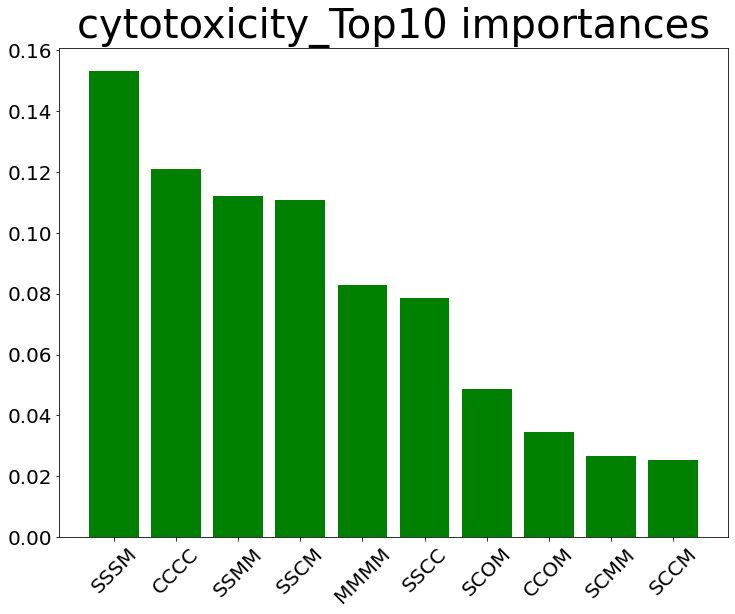

In [18]:
importances = rfc.feature_importances_

plt.figure(figsize=[12,9])
plt.title("cytotoxicity_Top10 importances", fontsize=40)
plt.bar(range(10), np.sort(importances)[::-1][:10],color='green')
importances_index_reverse = np.argsort(importances)[::-1][:10]
plt.xticks(range(10), X.columns[importances_index_reverse],fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.savefig('./cytotoxicity/cytotoxicity_Top10 importances.png')
plt.show()

In [19]:
pd.DataFrame(np.sort(importances)[::-1][:10],X.columns[importances_index_reverse])

,0
SSSM,0.153105
CCCC,0.120992
SSMM,0.112236
SSCM,0.110864
MMMM,0.082983
SSCC,0.078625
SCOM,0.048768
CCOM,0.034669
SCMM,0.026787
SCCM,0.025535


array([0.15310496, 0.1209916 , 0.11223612, 0.11086352, 0.08298293,
       0.07862518, 0.0487681 , 0.0346685 , 0.02678695, 0.02553475])

## 预测新数据

In [15]:
generate = pd.read_csv('./generate_out_xa.csv',index_col=0)#.iloc[:,1:]
generate_prediction = regressor.predict(generate)
pd.DataFrame(generate_prediction).to_excel('./cytotoxicity/cytotoxicity_pred_gene_RF.xlsx')

## 主成分分析

In [125]:
database = pd.read_csv('./SupplementaryData_AuAgPtPd_xa.csv',index_col=0).iloc[:,1:]
generate = pd.read_csv('./generate_out_xa.csv',index_col=0)#.iloc[:,1:]

pca = PCA(n_components=3,copy=True,random_state=8)

databasePCA = pca.fit_transform(database)
pd.DataFrame(databasePCA).to_excel('./PCA_database.xlsx')
generatePCA = pca.fit_transform(generate)
pd.DataFrame(generatePCA).to_excel('./PCA_generate.xlsx')

********************